<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/dacon/ConstuctionMachine/ConstuctionMachineOil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [93]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [94]:
!pwd

/content


In [95]:
!unzip -uq "/gdrive/MyDrive/data/ConstructionMachineOil/open.zip" -d"/content"

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import gc


#csv to parquet

In [97]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [98]:
csv_to_parquet('./train.csv', 'train')
csv_to_parquet('./test.csv', 'test')

train Done.
test Done.


In [99]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

# 데이터 살펴보기

## 데이터정보

In [100]:
info=pd.read_excel('/gdrive/MyDrive/data/ConstructionMachineOil/data_info.xlsx')
info

,Feature Name,Description,단위,비고
0,COMPONENT_ARBITRARY,"샘플 오일 관련 부품 (Component 4종, 비식별화)",NaN,NaN
1,ANONYMOUS_1,무명 Feautre 1. 수치형 데이터,NaN,NaN
2,YEAR,오일 샘플 및 진단 해 (Year),NaN,NaN
3,SAMPLE_TRANSFER_DAY,오일 샘플링 후 진단 기관으로 이동한 기간 (Days),NaN,NaN
4,ANONYMOUS_2,무명 Feautre 2. 수치형 데이터,NaN,NaN
5,AG,원소기호 AG - Silver 함유량,ppm,NaN
6,AL,원소기호 AL - Aluminium 함유량,ppm,NaN
7,B,원소기호 B - Boron 함유량,ppm,NaN
8,BA,원소기호 BA - Barium 함유량,ppm,NaN
9,BE,원소기호 BE - Beryllium 함유량,ppm,NaN


In [101]:
smpl_sub=pd.read_csv('sample_submission.csv')

In [102]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


In [103]:
#숫자
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

##널값확인

In [105]:
#Y Label = target
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [106]:
train.corr()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
ANONYMOUS_1,1.000000,0.106546,-0.041395,0.072154,-0.025674,0.017924,0.013467,-0.064204,-0.010805,-0.015321,...,-0.019708,-0.022825,-0.033298,-0.017366,-0.008237,0.001883,-0.016927,0.019542,-0.019991,0.044197
YEAR,0.106546,1.000000,-0.094086,0.138199,-0.129124,-0.017525,0.011145,-0.098589,-0.063859,0.090465,...,0.008850,-0.010067,-0.022266,0.011152,0.001064,-0.027624,-0.154128,-0.051584,0.048572,-0.087871
SAMPLE_TRANSFER_DAY,-0.041395,-0.094086,1.000000,-0.000060,0.021211,-0.017493,0.004305,0.016909,0.009600,0.008826,...,0.011643,0.020284,0.030461,0.010787,0.012700,-0.002412,0.006226,0.013896,-0.019428,-0.004315
ANONYMOUS_2,0.072154,0.138199,-0.000060,1.000000,-0.006266,-0.022788,-0.100307,-0.011871,0.011162,-0.043046,...,-0.001921,-0.005246,-0.009702,-0.016891,-0.012842,-0.006469,-0.044917,-0.025339,0.032758,-0.033641
AG,-0.025674,-0.129124,0.021211,-0.006266,1.000000,0.019600,-0.028131,0.031649,0.020884,-0.004489,...,0.008361,0.006323,-0.010215,-0.008110,-0.002812,-0.003853,0.024616,0.013592,0.002631,0.014671
AL,0.017924,-0.017525,-0.017493,-0.022788,0.019600,1.000000,0.000037,0.240863,-0.000858,-0.070322,...,-0.007348,-0.007812,-0.003405,-0.007312,-0.015504,0.026213,0.016754,0.013823,-0.024873,0.370512
B,0.013467,0.011145,0.004305,-0.100307,-0.028131,0.000037,1.000000,-0.045454,-0.013252,0.356121,...,-0.003079,-0.000280,0.010742,0.025136,0.014559,0.018197,0.041301,-0.000882,-0.006463,-0.029787
BA,-0.064204,-0.098589,0.016909,-0.011871,0.031649,0.240863,-0.045454,1.000000,0.029900,-0.008642,...,0.007547,0.013480,0.005625,-0.013144,-0.008746,0.000480,0.029214,0.004150,-0.009574,0.104840
BE,-0.010805,-0.063859,0.009600,0.011162,0.020884,-0.000858,-0.013252,0.029900,1.000000,0.006735,...,-0.014197,-0.014516,-0.012651,-0.004631,0.014112,0.000482,-0.021376,0.001359,0.012394,0.010685
CA,-0.015321,0.090465,0.008826,-0.043046,-0.004489,-0.070322,0.356121,-0.008642,0.006735,1.000000,...,-0.013280,-0.003550,0.011510,-0.006454,0.009428,-0.014419,-0.011466,-0.059102,0.110625,-0.150379


In [107]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [108]:
#null값 비율 체크
train.isna().sum()/len(train)

ID                     0.000000
COMPONENT_ARBITRARY    0.000000
ANONYMOUS_1            0.000000
YEAR                   0.000000
SAMPLE_TRANSFER_DAY    0.000000
ANONYMOUS_2            0.000000
AG                     0.000000
AL                     0.000000
B                      0.000000
BA                     0.000000
BE                     0.000000
CA                     0.000000
CD                     0.098900
CO                     0.000000
CR                     0.000000
CU                     0.000000
FH2O                   0.724016
FNOX                   0.724016
FOPTIMETHGLY           0.724016
FOXID                  0.724016
FSO4                   0.724016
FTBN                   0.724016
FE                     0.000000
FUEL                   0.724016
H2O                    0.000000
K                      0.163107
LI                     0.000000
MG                     0.000000
MN                     0.000000
MO                     0.000000
NA                     0.000000
NI      

In [109]:
##결측치 비율이 20%가 넘는 column 확인 후 제거
[train.isna().sum()/len(train)>0.20]

[ID                     False
 COMPONENT_ARBITRARY    False
 ANONYMOUS_1            False
 YEAR                   False
 SAMPLE_TRANSFER_DAY    False
 ANONYMOUS_2            False
 AG                     False
 AL                     False
 B                      False
 BA                     False
 BE                     False
 CA                     False
 CD                     False
 CO                     False
 CR                     False
 CU                     False
 FH2O                    True
 FNOX                    True
 FOPTIMETHGLY            True
 FOXID                   True
 FSO4                    True
 FTBN                    True
 FE                     False
 FUEL                    True
 H2O                    False
 K                      False
 LI                     False
 MG                     False
 MN                     False
 MO                     False
 NA                     False
 NI                     False
 P                      False
 PB       

In [110]:
#컬럼확인
train.columns[[train.isna().sum()/len(train)>0.20]]

Index(['FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL',
       'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4',
       'V100'],
      dtype='object')

In [111]:
#결측치 비율 많은 column 드랍
train=train.drop(columns = train.columns[train.isna().sum()/len(train) > 0.20], axis = 1)

In [112]:
#54개 컬럼 -> 37개 컬럼
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0


In [113]:
#CD and K는 mean으로 채우기
train.isnull().sum()

ID                        0
COMPONENT_ARBITRARY       0
ANONYMOUS_1               0
YEAR                      0
SAMPLE_TRANSFER_DAY       0
ANONYMOUS_2               0
AG                        0
AL                        0
B                         0
BA                        0
BE                        0
CA                        0
CD                     1394
CO                        0
CR                        0
CU                        0
FE                        0
H2O                       0
K                      2299
LI                        0
MG                        0
MN                        0
MO                        0
NA                        0
NI                        0
P                         0
PB                        0
PQINDEX                   0
S                         0
SB                        0
SI                        0
SN                        0
TI                        0
V                         0
V40                       0
ZN                  

In [114]:
#CD and K는 mean으로 채우기
train['CD']=train['CD'].fillna(train['CD'].mean())
train['K']=train['K'].fillna(train['K'].mean())

In [115]:
train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
SAMPLE_TRANSFER_DAY    0
ANONYMOUS_2            0
AG                     0
AL                     0
B                      0
BA                     0
BE                     0
CA                     0
CD                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
K                      0
LI                     0
MG                     0
MN                     0
MO                     0
NA                     0
NI                     0
P                      0
PB                     0
PQINDEX                0
S                      0
SB                     0
SI                     0
SN                     0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

In [116]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

## 칼럼정의

In [117]:
#카테고리컬 숫자형 피쳐로 분류
categorical_featrues=['ID','COMPONENT_ARBITRARY','YEAR','Y_LABEL']
numerical_features=[
    i 
    for i in train.columns 
    if i not in categorical_featrues
    ]

## 시각화

### Numerical column 시각화

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   14095 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

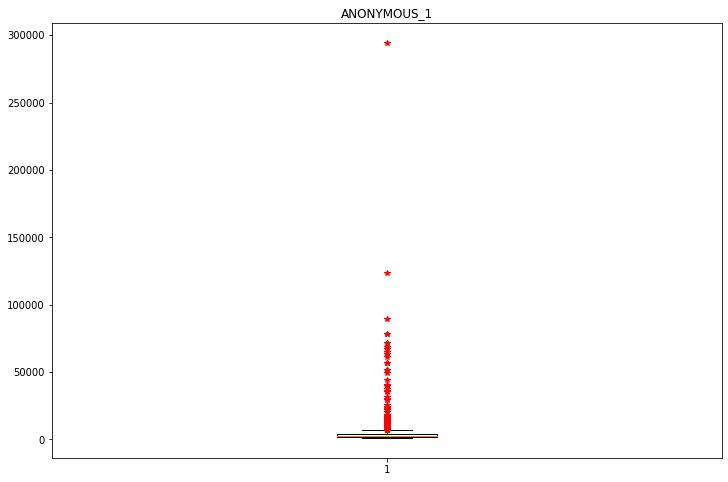

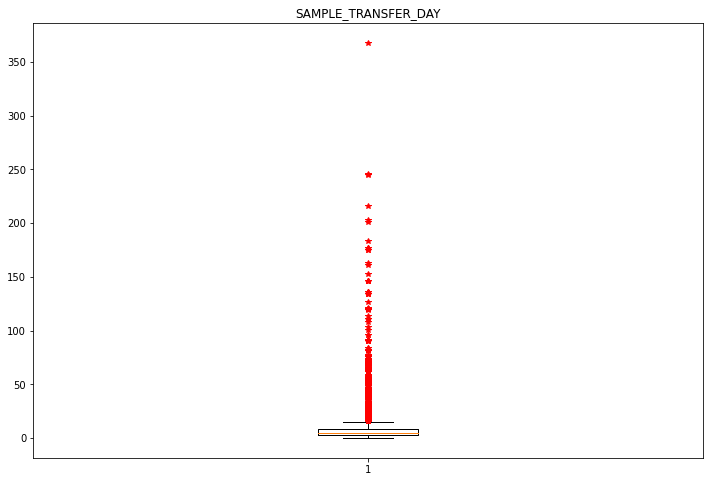

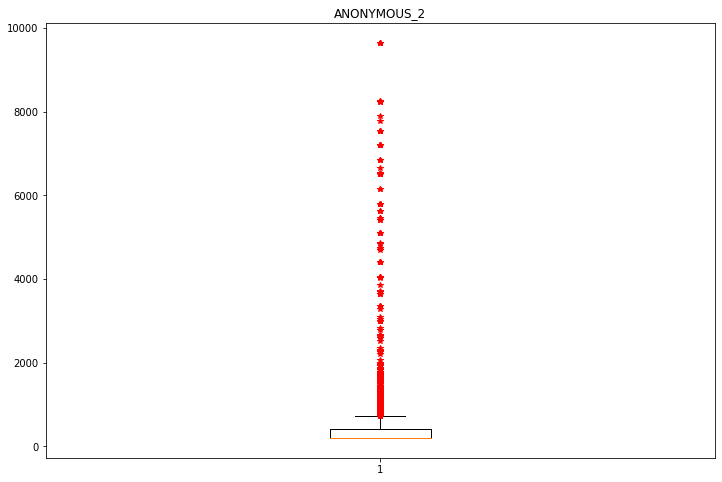

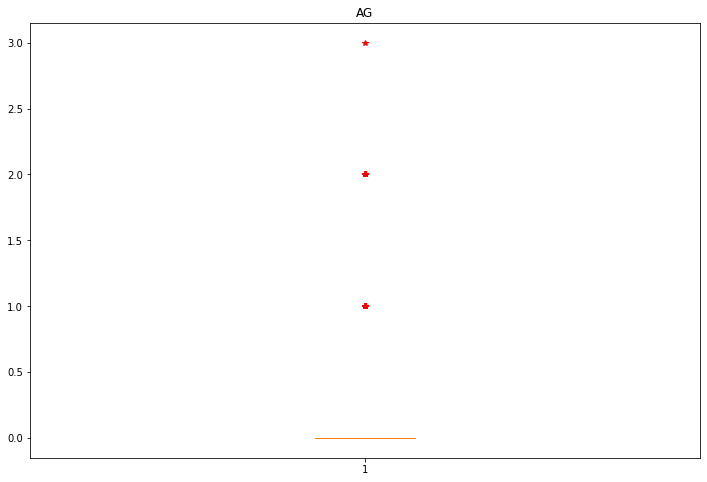

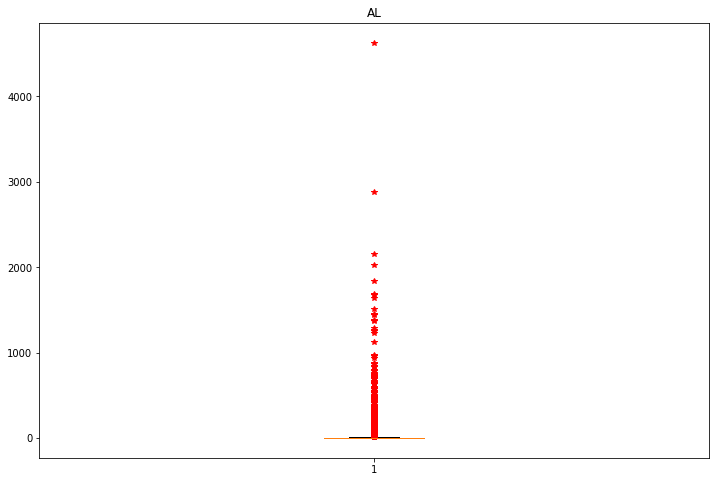

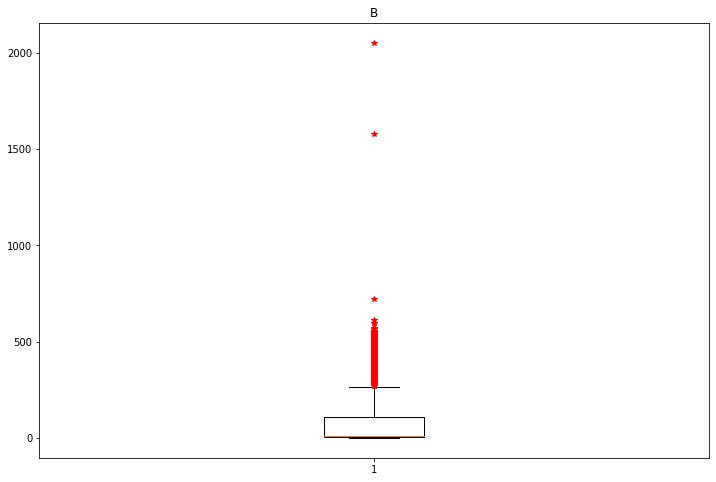

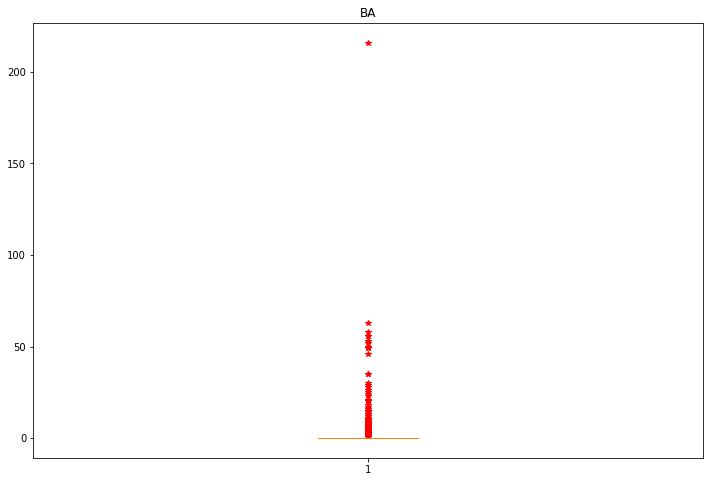

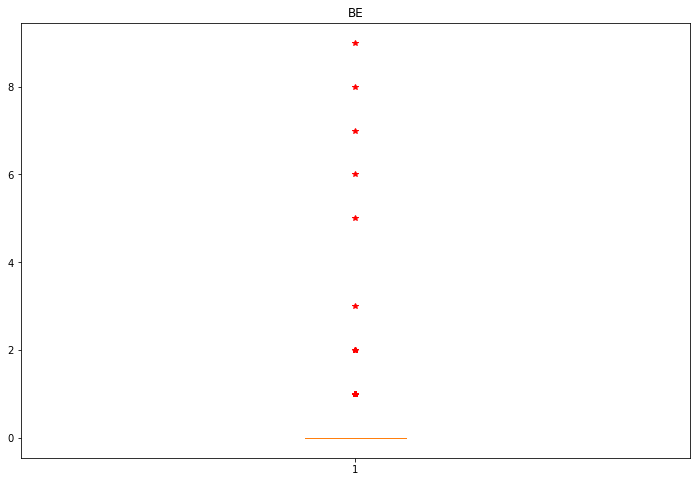

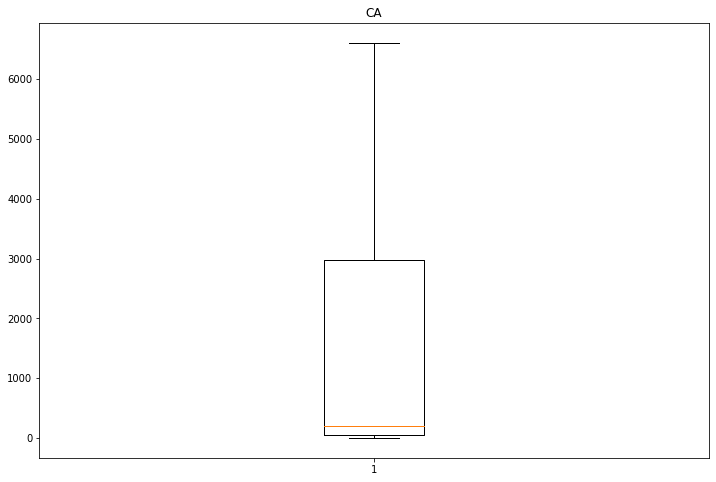

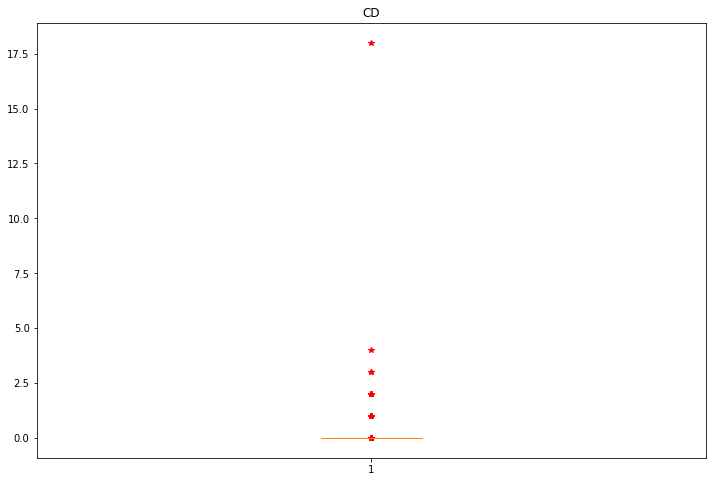

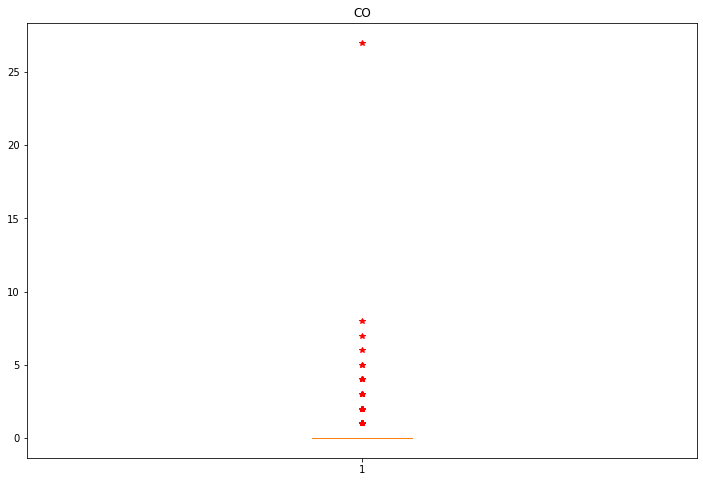

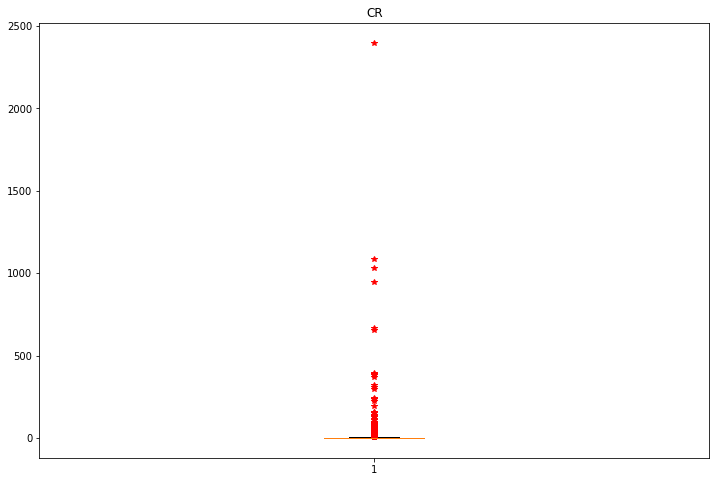

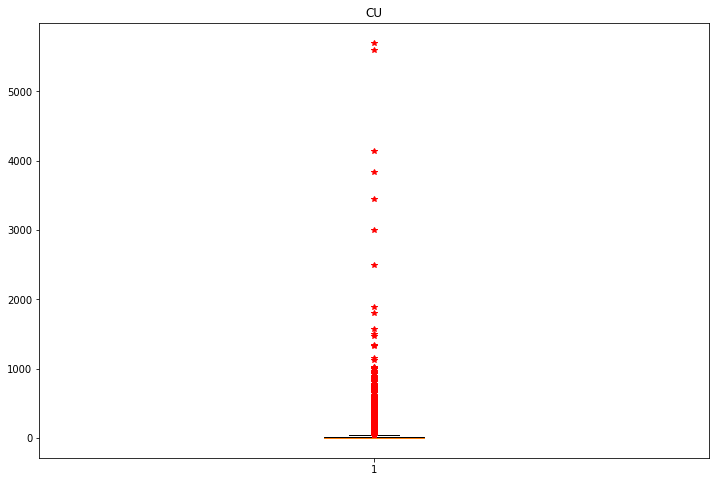

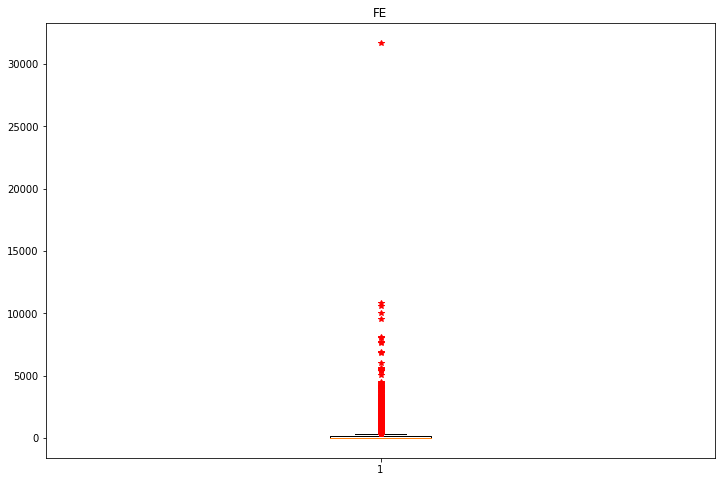

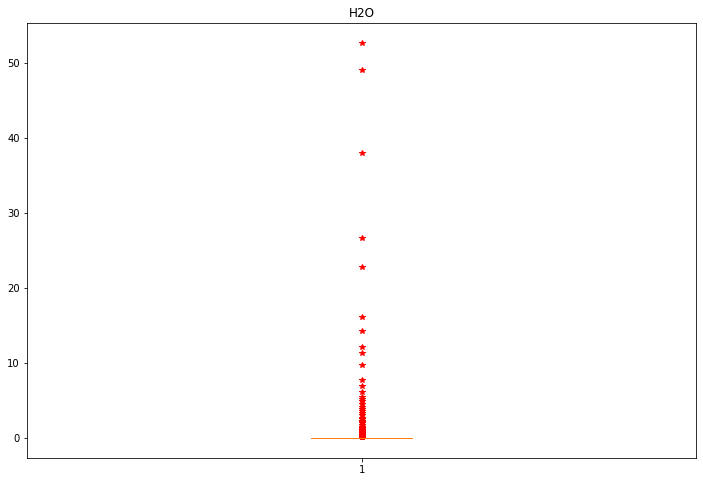

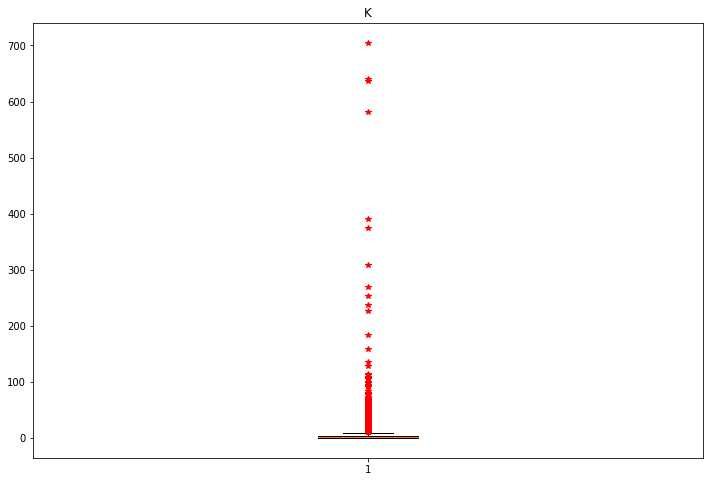

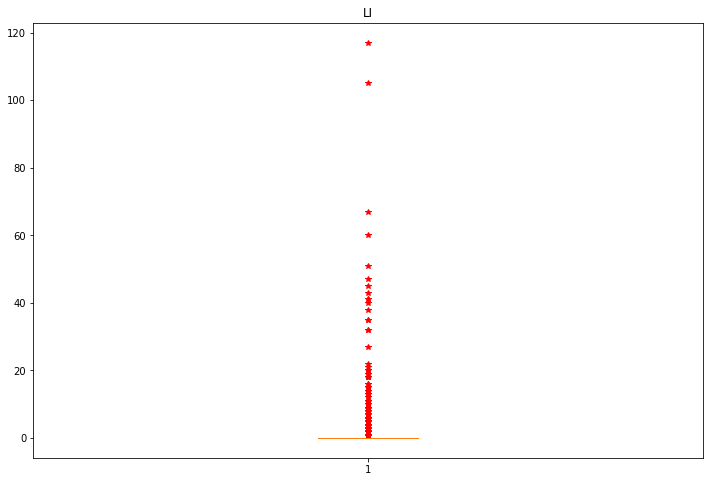

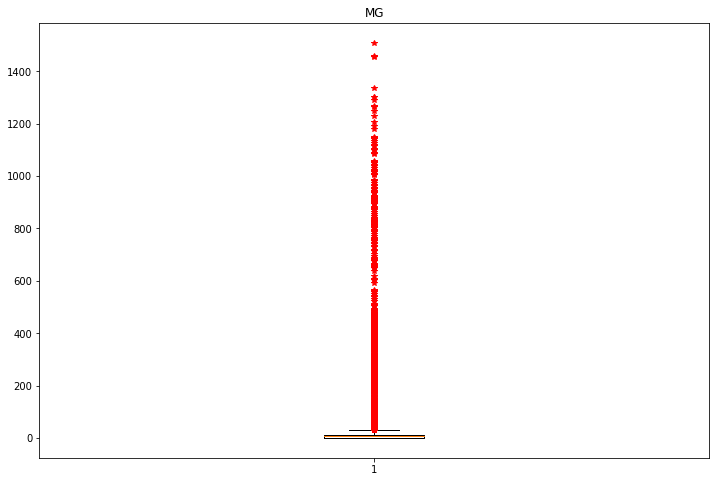

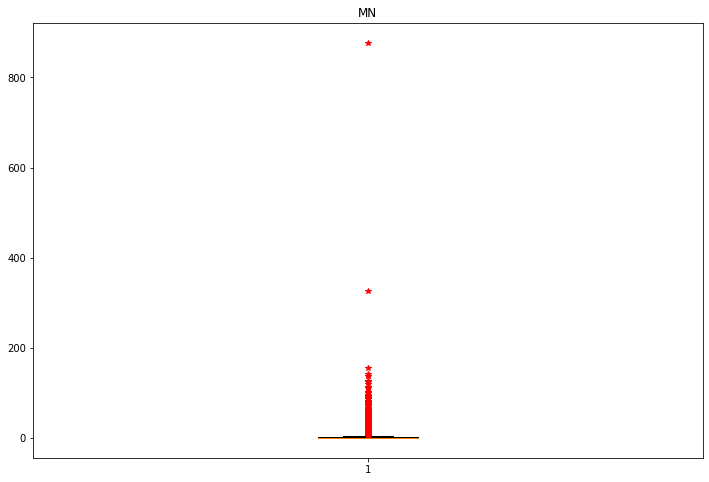

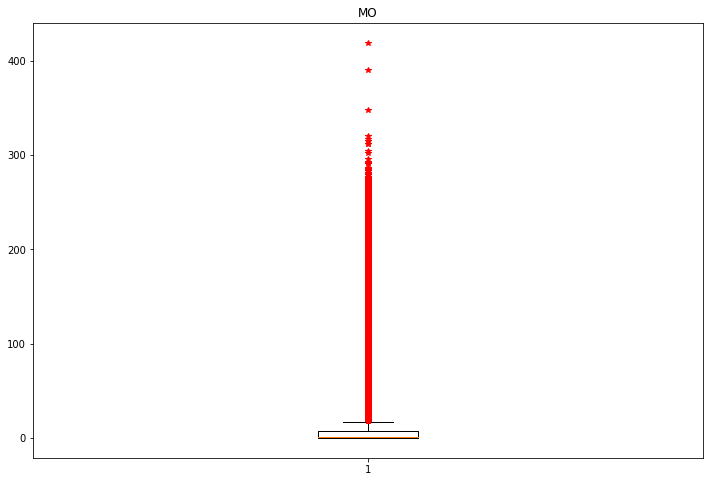

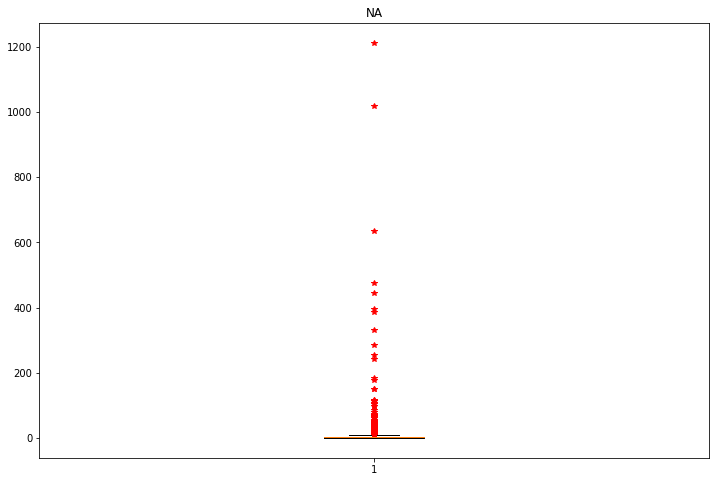

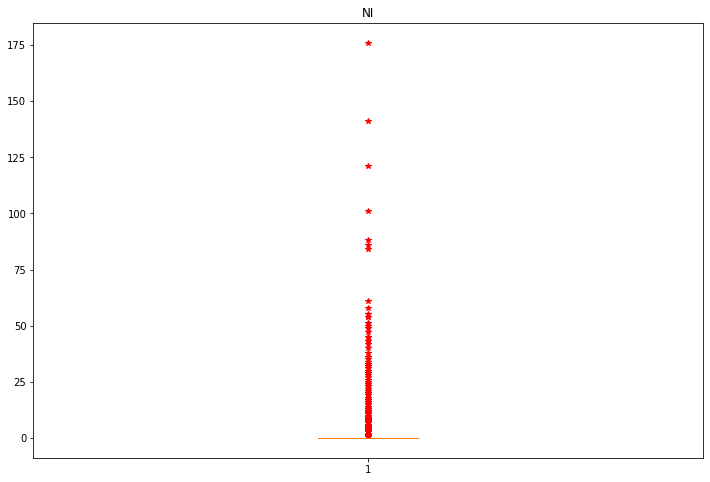

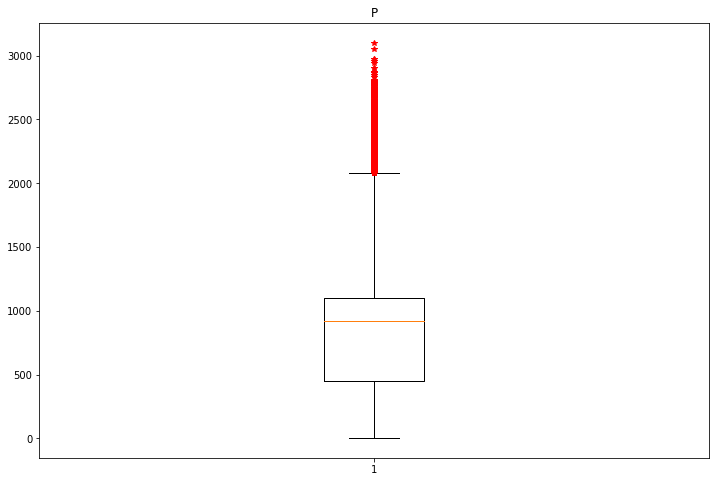

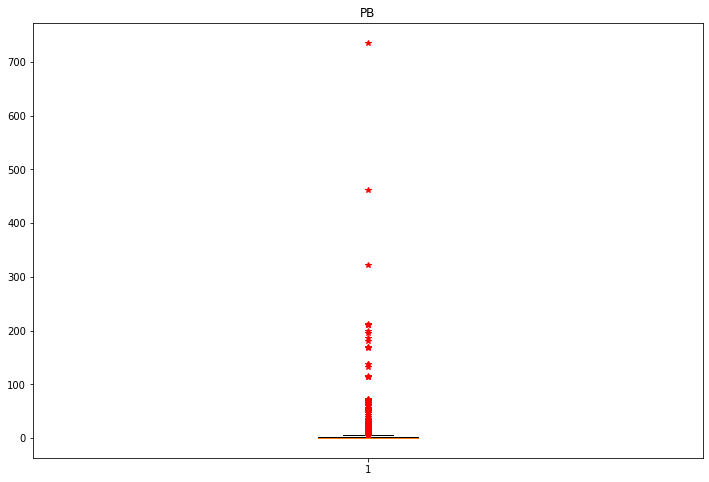

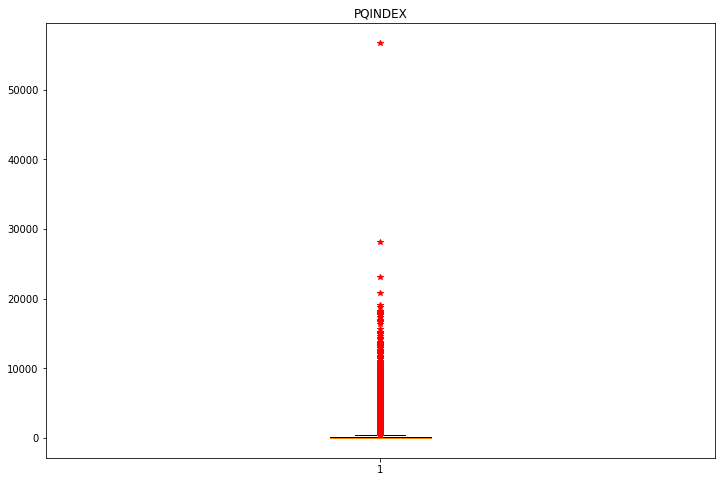

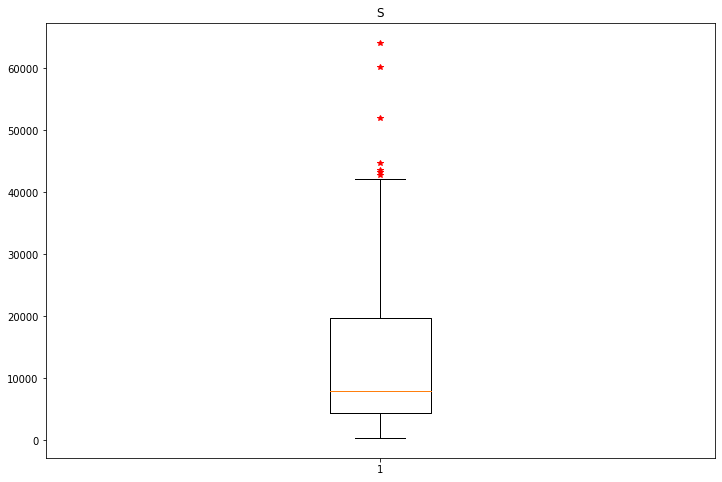

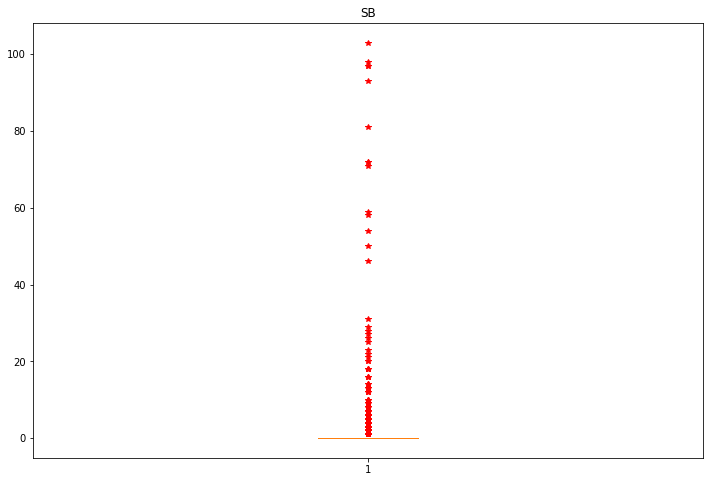

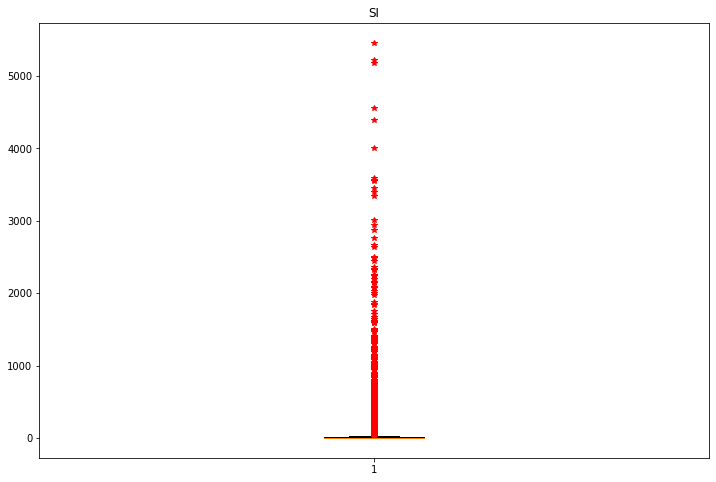

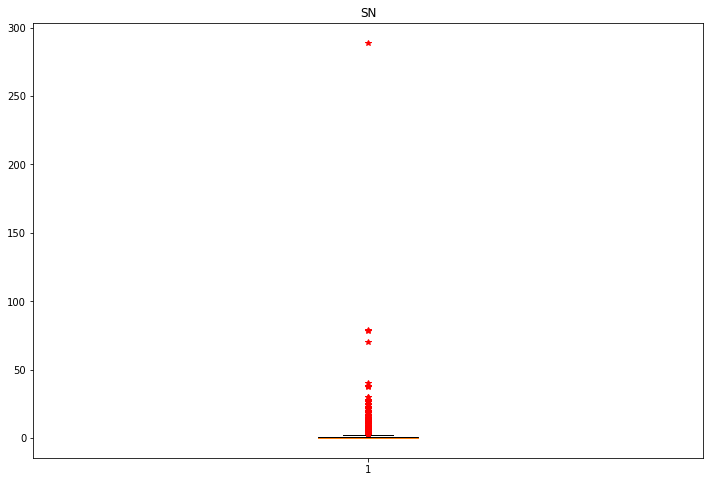

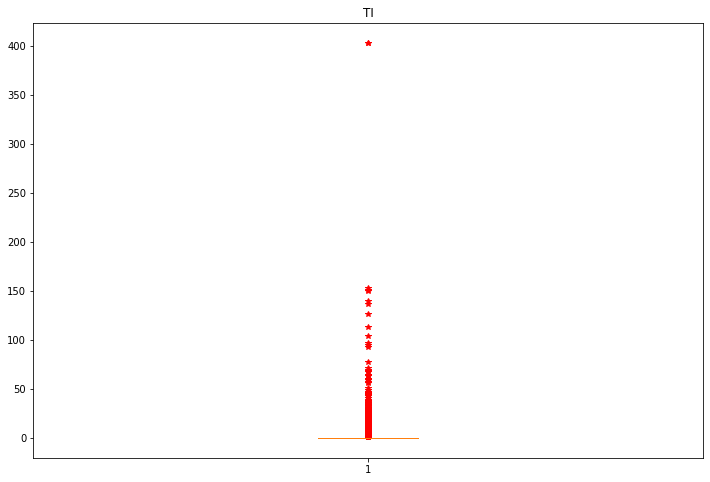

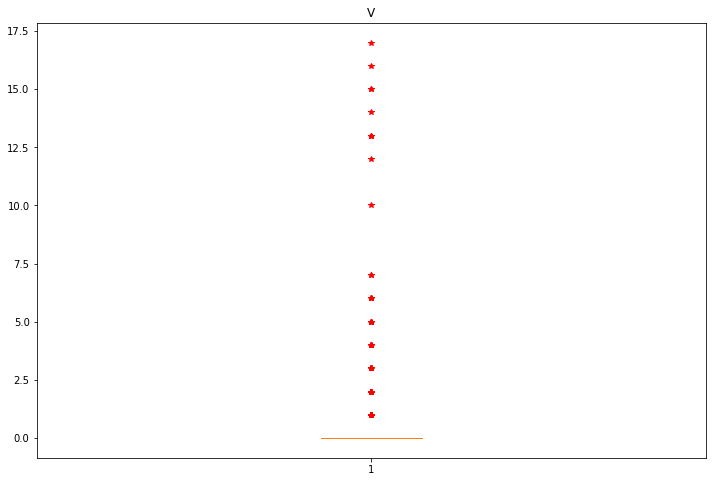

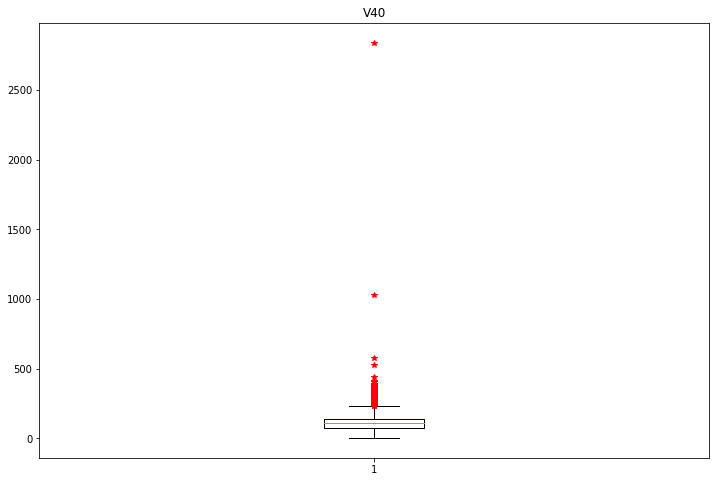

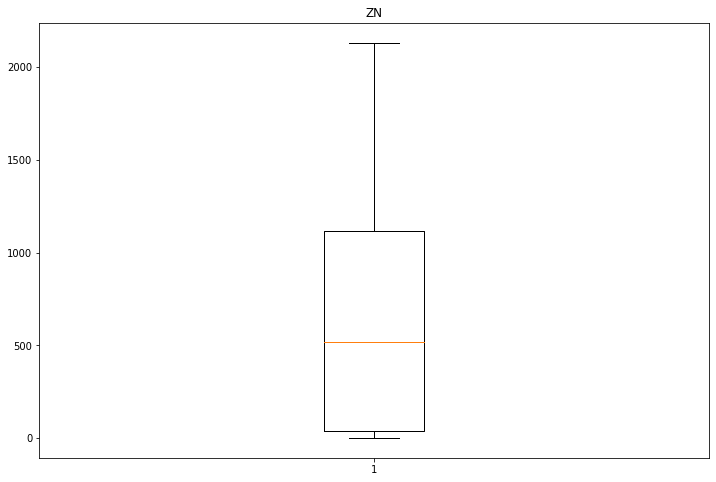

In [119]:
# 숫자형 피쳐들 시각화
for col in numerical_features :
  plt.figure(figsize=(12,8))
  plt.boxplot(train[col], sym='r*')
  plt.title(col)
  plt.show()



### Y_LABEL 시각화

In [120]:
train.Y_LABEL.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

([<matplotlib.patches.Wedge at 0x7f78374b76a0>,
 [Text(-0.2914249600082275, -1.060693873218943, '0'),
  Text(0.29142503449022283, 1.06069385275506, '1')],
 [Text(-0.1589590690953968, -0.5785602944830598, '91.47%'),
  Text(0.1589591097219397, 0.5785602833209417, '8.53%')])

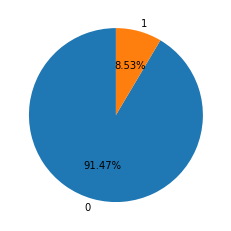

In [121]:
#Y_LABEL
plt.pie(train['Y_LABEL'].value_counts(), labels=train['Y_LABEL'].value_counts().index,  autopct="%.2f%%", startangle = 90)


<AxesSubplot:xlabel='Y_LABEL', ylabel='count'>

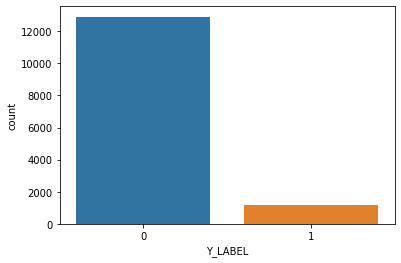

In [122]:
sns.countplot(data=train, x='Y_LABEL')

### Categorical column-COMPONENT_ARBITRARY 시각화

<AxesSubplot:xlabel='COMPONENT_ARBITRARY', ylabel='count'>

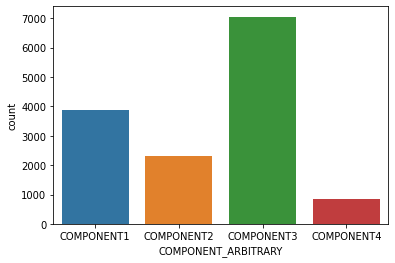

In [123]:
#COMPONENT_ARBITRARY
sns.countplot(data=train, x='COMPONENT_ARBITRARY', order= ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

<AxesSubplot:xlabel='COMPONENT_ARBITRARY', ylabel='count'>

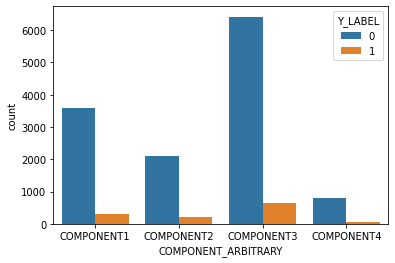

In [124]:
#y_label을 x값으로 둬서 시각화
sns.countplot(data=train, x='COMPONENT_ARBITRARY',hue='Y_LABEL',order= ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

## 유사성

decribe()함수

count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

In [125]:
##mean과 50%가 크게 차이나면 이상치가 다수 존재할것으로 예상

## 데이터가 너무 많기 때문에 숫자로 보는것이 어려움
train.describe().round(4)

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
count,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,...,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000
mean,3146.0829,2013.6525,7.6006,387.4169,0.0258,12.7077,64.0262,0.6928,0.0063,1366.7576,...,415.1596,12029.3186,0.4770,35.0582,0.9098,0.7079,0.0507,109.3558,588.6468,0.0853
std,4216.0898,3.9648,11.6816,550.0161,0.1719,86.9680,102.8769,2.9055,0.1522,1481.9247,...,1528.1910,9325.6102,2.7299,195.3290,3.6043,6.8976,0.4754,49.6124,531.7434,0.2794
min,1000.0000,2007.0000,0.0000,200.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,386.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.9000,0.0000,0.0000
25%,1655.0000,2010.0000,3.0000,200.0000,0.0000,1.0000,3.0000,0.0000,0.0000,48.0000,...,12.0000,4440.5000,0.0000,3.0000,0.0000,0.0000,0.0000,71.8000,37.0000,0.0000
50%,2227.0000,2014.0000,5.0000,200.0000,0.0000,2.0000,11.0000,0.0000,0.0000,198.0000,...,29.0000,8034.0000,0.0000,6.0000,0.0000,0.0000,0.0000,111.3000,520.0000,0.0000
75%,3797.0000,2017.0000,8.0000,410.0000,0.0000,4.0000,110.0000,0.0000,0.0000,2975.0000,...,181.0000,19750.0000,0.0000,12.0000,1.0000,0.0000,0.0000,137.2000,1119.0000,0.0000
max,294451.0000,2022.0000,368.0000,9650.0000,3.0000,4630.0000,2051.0000,216.0000,9.0000,6609.0000,...,56761.0000,64160.0000,103.0000,5459.0000,289.0000,403.0000,17.0000,2840.5000,2132.0000,1.0000


<AxesSubplot:>

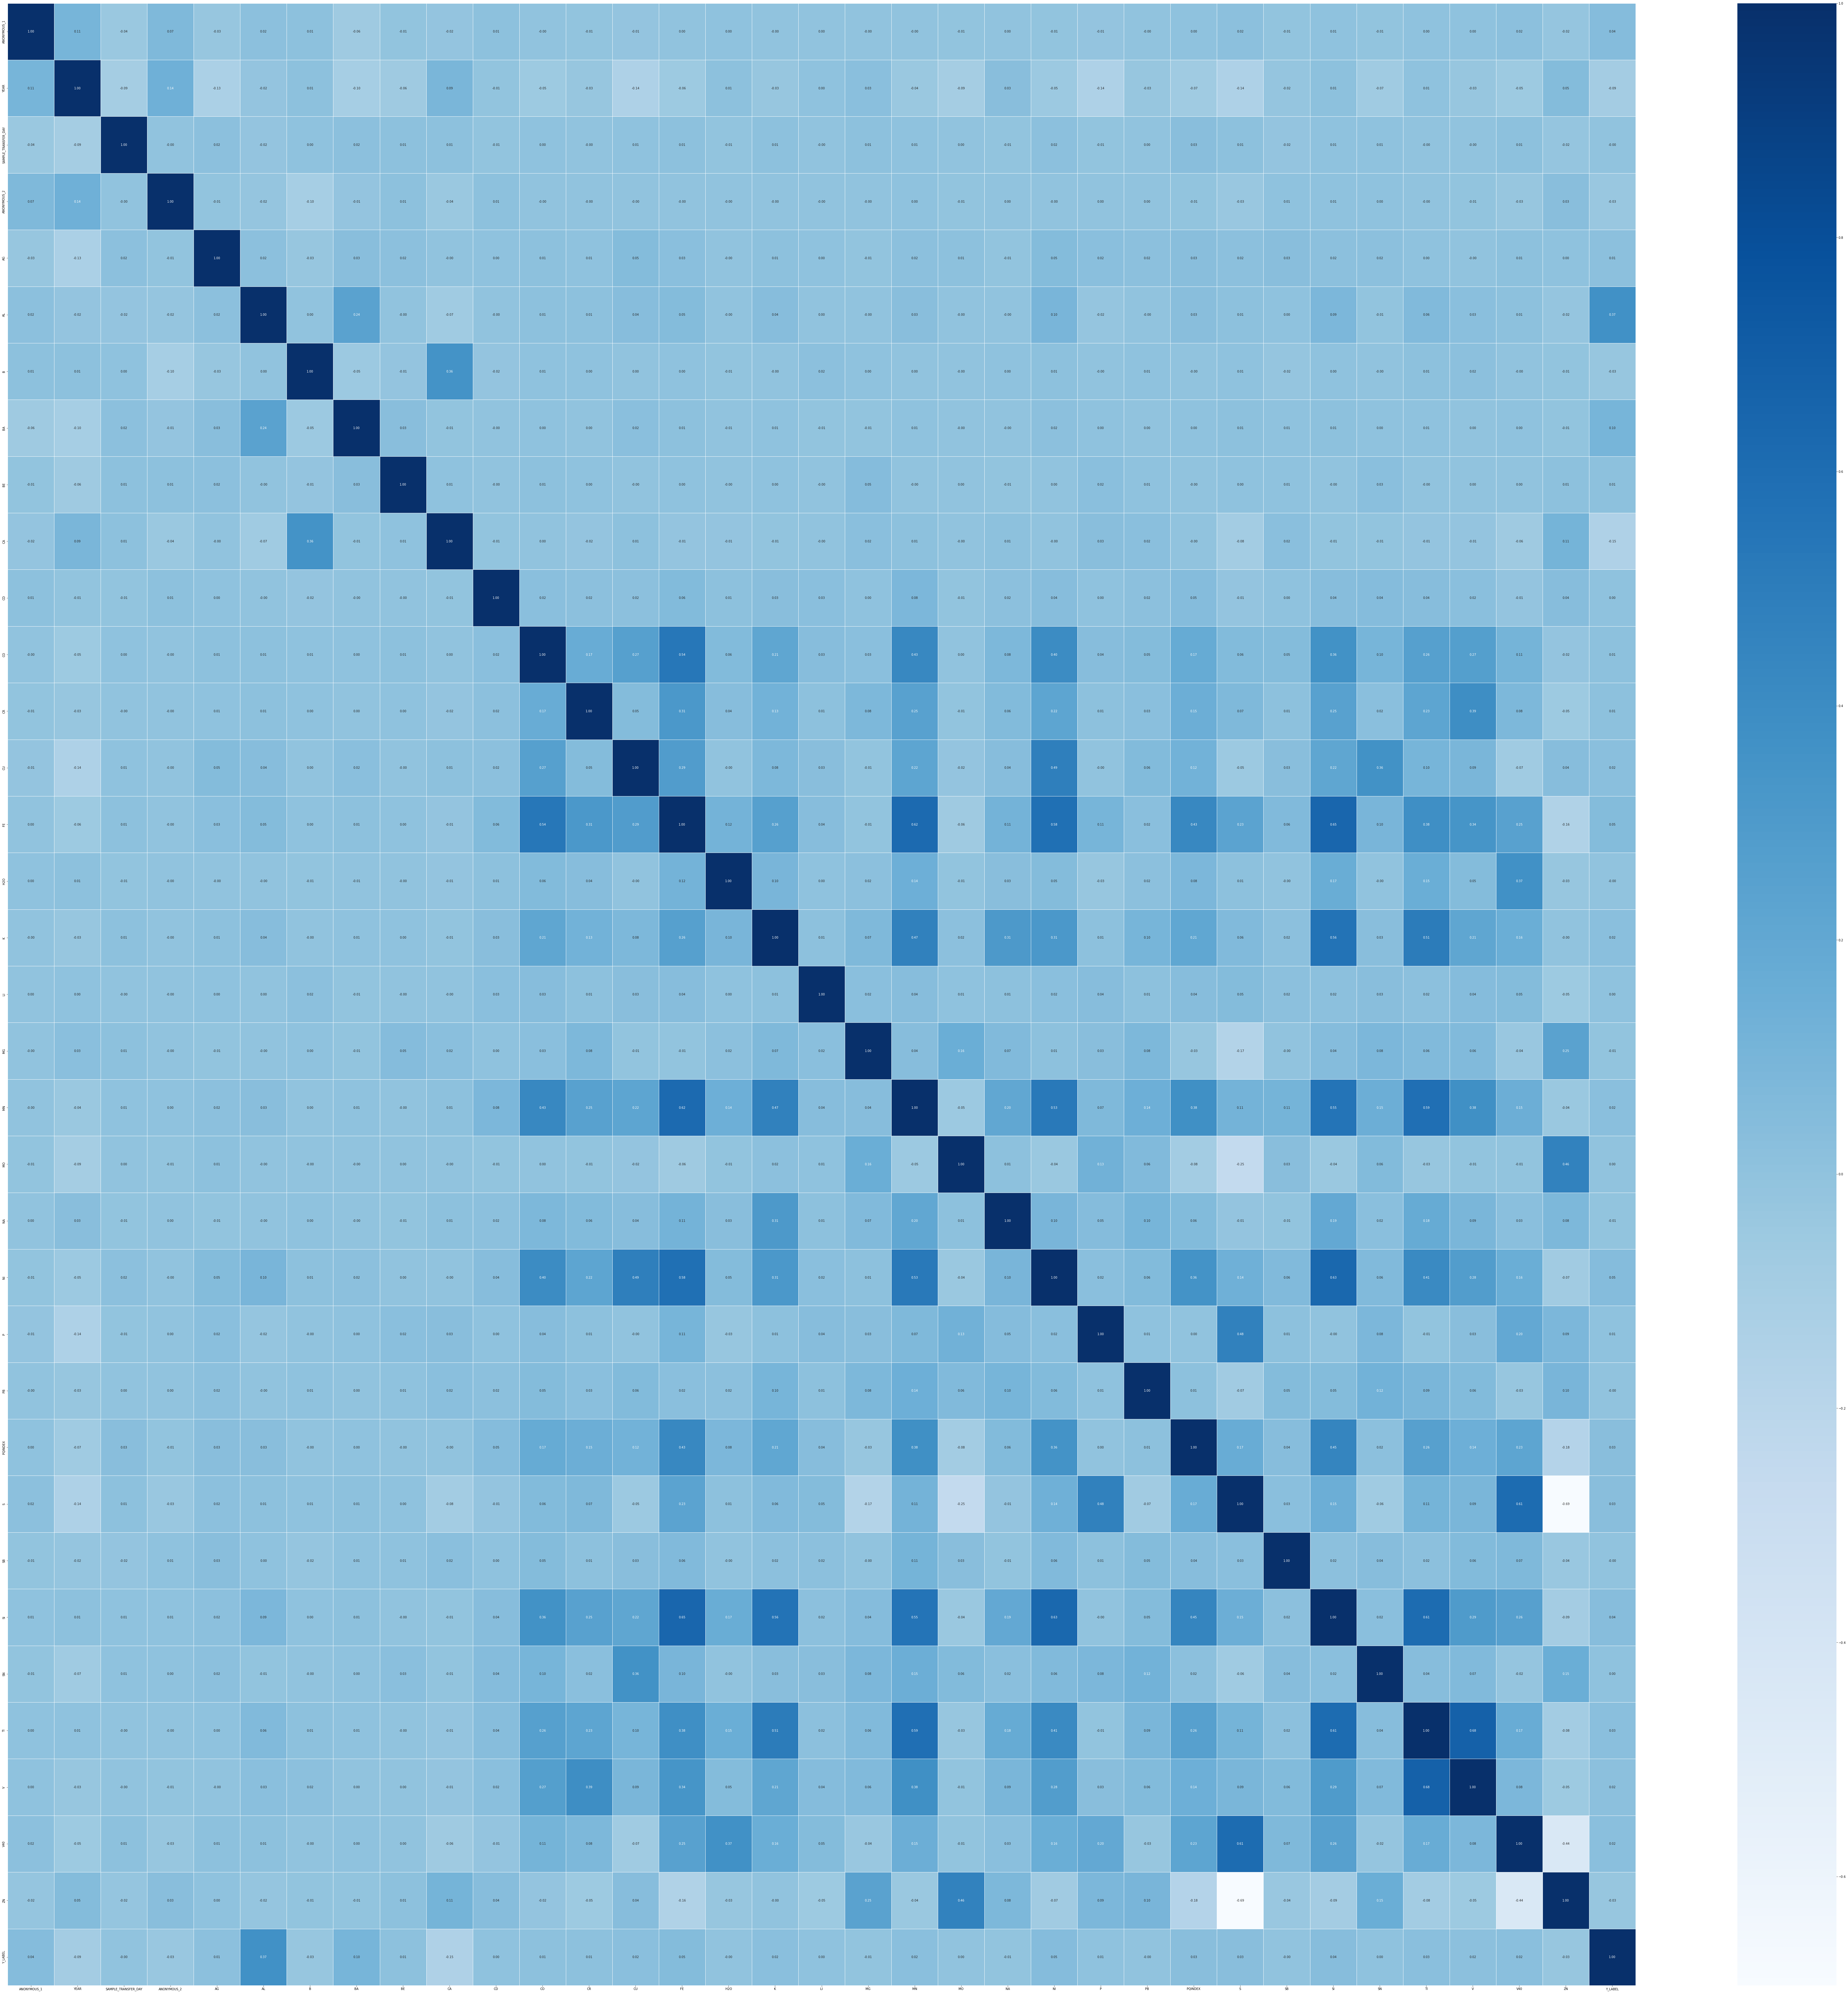

In [126]:
#컬럼수가 많을경우 이런 방법 쓰는게 유용할듯

train_corr=train
train_corr=train_corr.astype({'Y_LABEL':'int'})
corr=train_corr.corr(method='pearson')
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [127]:
# #컬럼수가 많아서 target과 상관도가 높은 순서대로 출력해봄

# 데이터프레임으로 표현하기
# correlation = corr.unstack()
# train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
# train_temp.style.background_gradient(cmap='viridis')
corr_mat=train.corr()
corr_mat['Y_LABEL'].sort_values(ascending=False)

Y_LABEL                1.000000
AL                     0.370512
BA                     0.104840
FE                     0.047992
NI                     0.046806
ANONYMOUS_1            0.044197
SI                     0.036731
PQINDEX                0.028966
S                      0.027923
TI                     0.025637
CU                     0.024975
MN                     0.024274
V40                    0.023195
K                      0.021805
V                      0.020862
AG                     0.014671
CR                     0.014233
BE                     0.010685
CO                     0.008175
P                      0.007602
CD                     0.004878
LI                     0.002921
SN                     0.002359
MO                     0.001206
SB                    -0.002028
PB                    -0.003549
H2O                   -0.004262
SAMPLE_TRANSFER_DAY   -0.004315
MG                    -0.008807
NA                    -0.010820
ZN                    -0.027551
B       

- 정상치와 이상치의 비율이 지나치게 Imbalance하다.
- 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
- 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
- train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.

--> 즉 실질적으로 데이터를 건들고 수정하기보다는 모델선정과 일반화에 집중해야할것으로 보임

##데이터정리

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random

import warnings
warnings.filterwarnings(action='ignore') 

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

###Data split

In [130]:
train_x=train.drop(['ID','Y_LABEL'], axis=1)
train_y=train['Y_LABEL']

test=test.drop(['ID'], axis=1)
x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y, test_size=0.2, random_state=42, stratify=train_y)

In [131]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(11276, 35)
(11276,)
(2819, 35)
(2819,)


xxxx원핫인코딩xxxx

In [ ]:
# ohe=pd.get_dummies(data=train['COMPONENT_ARBITRARY'], columns=['COMPONENT_ARBITRARY'])

In [ ]:
# train=pd.concat([train,ohe],axis=1)

### Data label-encoding, scaling


fit_transform()은 training data에만 사용 / transfrom은 test data에만 사용

In [132]:
x_train['ZN'].shape

(11276,)

In [133]:
categorical_featrues

['ID', 'COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL']

In [134]:
categorical_featrues=['COMPONENT_ARBITRARY', 'YEAR']

In [135]:
categorical_featrues

['COMPONENT_ARBITRARY', 'YEAR']

In [136]:
def get_values(value):
  return value.values.reshape(-1,1)

for col in x_train.columns:
  if col not in categorical_featrues:
    scaler=StandardScaler()
    x_train[col]=scaler.fit_transform(get_values(x_train[col]))
    x_valid[col]=scaler.transform(get_values(x_valid[col]))
    if col in test.columns:
      test[col]=scaler.transform(get_values(test[col]))


le = LabelEncoder()
for col in categorical_featrues:    
    x_train[col] = le.fit_transform(x_train[col])
    x_valid[col] = le.transform(x_valid[col])
    if col in test.columns:
     test[col] = le.transform(test[col])


원핫인코딩 COMPONENT_ARBITRARY</br>
test drop </br>
SAMPLE_TRANSFER_DAY
AL
B
BA
BE
CA
CD
FH2O
FNOX
FOPTIMETHGLY
FOXID
FSO4
FTBN
FUEL
K
LI
MG
NA
P
PB
S
SB
SI
SN
SOOTPERCENTAGE
U100
U75
U50
U25
U20
U14
U6
U4
V100
Y_LABEL

#모델링

### Hyperparameter setting

In [49]:
CFG = {
    'EPOCHS': 30,
    'LEARNING_RATE':1e-2,
    'BATCH_SIZE':256,
    'SEED':41
}

### Fixed RandomSeed

In [50]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED'])

### CustomDataset

In [51]:
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

In [52]:
class CustomDataset(Dataset):
    def __init__(self, data_X, data_y, distillation=False):
        super(CustomDataset, self).__init__()
        self.data_X = data_X
        self.data_y = data_y
        self.distillation = distillation
        
    def __len__(self):
        return len(self.data_X)
    
    def __getitem__(self, index):
        if self.distillation:
            # 지식 증류 학습 시
            teacher_X = torch.Tensor(self.data_X.iloc[index])
            student_X = torch.Tensor(self.data_X[test_stage_features].iloc[index])
            y = self.data_y.values[index]
            return teacher_X, student_X, y
        else:
            if self.data_y is None:
                test_X = torch.Tensor(self.data_X.iloc[index])
                return test_X
            else:
                teacher_X = torch.Tensor(self.data_X.iloc[index])
                y = self.data_y.values[index]
                return teacher_X, y

In [54]:
train_dataset = CustomDataset(x_train, y_train, False)
val_dataset = CustomDataset(x_valid, y_valid, False)

In [55]:
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False)

###Define Teacher Model


In [60]:
class Teacher(nn.Module):
    def __init__(self):
        super(Teacher, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=35, out_features=256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Linear(in_features=256, out_features=1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),
            nn.Linear(in_features=1024, out_features=256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Linear(in_features=256, out_features=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.classifier(x)
        return output

 Teacher Train / Validation

In [61]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):
    model.to(device)

    best_score = 0
    best_model = None
    criterion = nn.BCELoss().to(device)

    for epoch in range(CFG["EPOCHS"]):
        train_loss = []
  
        model.train()
        for X, y in tqdm(train_loader):
            X = X.float().to(device)
            y = y.float().to(device)
            
            optimizer.zero_grad()
            
            y_pred = model(X)
            
            loss = criterion(y_pred, y.reshape(-1, 1))
            loss.backward()
            
            optimizer.step()

            train_loss.append(loss.item())

        val_loss, val_score = validation_teacher(model, val_loader, criterion, device)
        print(f'Epoch [{epoch}], Train Loss : [{np.mean(train_loss) :.5f}] Val Loss : [{np.mean(val_loss) :.5f}] Val F1 Score : [{val_score:.5f}]')

        if scheduler is not None:
            scheduler.step(val_score)
            
        if best_score < val_score:
            best_model = model
            best_score = val_score
        
    return best_model 

In [62]:
def competition_metric(true, pred):
    return f1_score(true, pred, average="macro")

def validation_teacher(model, val_loader, criterion, device):
    model.eval()

    val_loss = []
    pred_labels = []
    true_labels = []
    threshold = 0.35
    
    with torch.no_grad():
        for X, y in tqdm(val_loader):
            X = X.float().to(device)
            y = y.float().to(device)
            
            model_pred = model(X.to(device))
            
            loss = criterion(model_pred, y.reshape(-1, 1))
            val_loss.append(loss.item())      
            
            model_pred = model_pred.squeeze(1).to('cpu')  
            pred_labels += model_pred.tolist()
            true_labels += y.tolist()
        
        pred_labels = np.where(np.array(pred_labels) > threshold, 1, 0)
        val_f1 = competition_metric(true_labels, pred_labels)
    return val_loss, val_f1  

Run(Teacher Model)

In [63]:
model = Teacher()
model.eval()
optimizer = torch.optim.Adam(model.parameters(), lr=CFG['LEARNING_RATE'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1, threshold_mode='abs',min_lr=1e-8, verbose=True)

teacher_model = train(model, optimizer, train_loader, val_loader, scheduler, device)

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [0], Train Loss : [0.23718] Val Loss : [0.16371] Val F1 Score : [0.79880]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [1], Train Loss : [0.18520] Val Loss : [0.15481] Val F1 Score : [0.80179]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [2], Train Loss : [0.17698] Val Loss : [0.14739] Val F1 Score : [0.81511]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [3], Train Loss : [0.19394] Val Loss : [0.15044] Val F1 Score : [0.82356]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [4], Train Loss : [0.18375] Val Loss : [0.14690] Val F1 Score : [0.82395]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [5], Train Loss : [0.16531] Val Loss : [0.14425] Val F1 Score : [0.83613]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [6], Train Loss : [0.15753] Val Loss : [0.14535] Val F1 Score : [0.82441]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [7], Train Loss : [0.15219] Val Loss : [0.14781] Val F1 Score : [0.82416]
Epoch 00008: reducing learning rate of group 0 to 5.0000e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [8], Train Loss : [0.14483] Val Loss : [0.14452] Val F1 Score : [0.81525]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [9], Train Loss : [0.14151] Val Loss : [0.15522] Val F1 Score : [0.81290]
Epoch 00010: reducing learning rate of group 0 to 2.5000e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [10], Train Loss : [0.14884] Val Loss : [0.15099] Val F1 Score : [0.80360]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [11], Train Loss : [0.14031] Val Loss : [0.14840] Val F1 Score : [0.82102]
Epoch 00012: reducing learning rate of group 0 to 1.2500e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [12], Train Loss : [0.12922] Val Loss : [0.14434] Val F1 Score : [0.82013]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [13], Train Loss : [0.13204] Val Loss : [0.14455] Val F1 Score : [0.81786]
Epoch 00014: reducing learning rate of group 0 to 6.2500e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [14], Train Loss : [0.12247] Val Loss : [0.14970] Val F1 Score : [0.81700]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [15], Train Loss : [0.12346] Val Loss : [0.15734] Val F1 Score : [0.79874]
Epoch 00016: reducing learning rate of group 0 to 3.1250e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [16], Train Loss : [0.11969] Val Loss : [0.15294] Val F1 Score : [0.80926]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [17], Train Loss : [0.11974] Val Loss : [0.14611] Val F1 Score : [0.81769]
Epoch 00018: reducing learning rate of group 0 to 1.5625e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [18], Train Loss : [0.12156] Val Loss : [0.14941] Val F1 Score : [0.81363]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [19], Train Loss : [0.11572] Val Loss : [0.14938] Val F1 Score : [0.81319]
Epoch 00020: reducing learning rate of group 0 to 7.8125e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [20], Train Loss : [0.11625] Val Loss : [0.14714] Val F1 Score : [0.82054]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [21], Train Loss : [0.11664] Val Loss : [0.14858] Val F1 Score : [0.81225]
Epoch 00022: reducing learning rate of group 0 to 3.9063e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [22], Train Loss : [0.11677] Val Loss : [0.15525] Val F1 Score : [0.80196]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [23], Train Loss : [0.11637] Val Loss : [0.15209] Val F1 Score : [0.81535]
Epoch 00024: reducing learning rate of group 0 to 1.9531e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [24], Train Loss : [0.11647] Val Loss : [0.14783] Val F1 Score : [0.81230]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [25], Train Loss : [0.11707] Val Loss : [0.14715] Val F1 Score : [0.81702]
Epoch 00026: reducing learning rate of group 0 to 9.7656e-06.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [26], Train Loss : [0.11755] Val Loss : [0.15221] Val F1 Score : [0.81181]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [27], Train Loss : [0.12152] Val Loss : [0.15040] Val F1 Score : [0.81290]
Epoch 00028: reducing learning rate of group 0 to 4.8828e-06.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [28], Train Loss : [0.12041] Val Loss : [0.15125] Val F1 Score : [0.81535]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [29], Train Loss : [0.11826] Val Loss : [0.15304] Val F1 Score : [0.81019]
Epoch 00030: reducing learning rate of group 0 to 2.4414e-06.


### Define Student Model

In [64]:
class Student(nn.Module):
    def __init__(self):
        super(Student, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=18, out_features=128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Linear(in_features=512, out_features=128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.classifier(x)
        return output

 Define Knowledge distillation Loss

In [65]:
def distillation(student_logits, labels, teacher_logits, alpha):
    distillation_loss = nn.BCELoss()(student_logits, teacher_logits)
    student_loss = nn.BCELoss()(student_logits, labels.reshape(-1, 1))
    return alpha * student_loss + (1-alpha) * distillation_loss

In [66]:
def distill_loss(output, target, teacher_output, loss_fn=distillation, opt=optimizer):
    loss_b = loss_fn(output, target, teacher_output, alpha=0.1)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()

    return loss_b.item()

Student Train / Validation

In [67]:
def student_train(s_model, t_model, optimizer, train_loader, val_loader, scheduler, device):
    s_model.to(device)
    t_model.to(device)
    
    best_score = 0
    best_model = None

    for epoch in range(CFG["EPOCHS"]):
        train_loss = []
        s_model.train()
        t_model.eval()
        
        for X_t, X_s, y in tqdm(train_loader):
            X_t = X_t.float().to(device)
            X_s = X_s.float().to(device)
            y = y.float().to(device)
            
            optimizer.zero_grad()

            output = s_model(X_s)
            with torch.no_grad():
                teacher_output = t_model(X_t)
                
            loss_b = distill_loss(output, y, teacher_output, loss_fn=distillation, opt=optimizer)

            train_loss.append(loss_b)

        val_loss, val_score = validation_student(s_model, t_model, val_loader, distill_loss, device)
        print(f'Epoch [{epoch}], Train Loss : [{np.mean(train_loss) :.5f}] Val Loss : [{np.mean(val_loss) :.5f}] Val F1 Score : [{val_score:.5f}]')
        
        if scheduler is not None:
            scheduler.step(val_score)
            
        if best_score < val_score:
            best_model = s_model
            best_score = val_score
        
    return best_model

In [68]:
def validation_student(s_model, t_model, val_loader, criterion, device):
    s_model.eval()
    t_model.eval()

    val_loss = []
    pred_labels = []
    true_labels = []
    threshold = 0.35
    
    with torch.no_grad():
        for X_t, X_s, y in tqdm(val_loader):
            X_t = X_t.float().to(device)
            X_s = X_s.float().to(device)
            y = y.float().to(device)
            
            model_pred = s_model(X_s)
            teacher_output = t_model(X_t)
            
            loss_b = distill_loss(model_pred, y, teacher_output, loss_fn=distillation, opt=None)
            val_loss.append(loss_b)
            
            model_pred = model_pred.squeeze(1).to('cpu')
            pred_labels += model_pred.tolist()
            true_labels += y.tolist()
        
        pred_labels = np.where(np.array(pred_labels) > threshold, 1, 0)
        val_f1 = competition_metric(true_labels, pred_labels)
    return val_loss, val_f1    

Run (Student Model)

In [69]:
train_dataset = CustomDataset(x_train, y_train, True)
val_dataset = CustomDataset(x_valid, y_valid, True)

train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False)

In [70]:
student_model = Student()
student_model.eval()
optimizer = torch.optim.Adam(student_model.parameters(), lr=CFG['LEARNING_RATE'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1, threshold_mode='abs',min_lr=1e-8, verbose=True)

best_student_model = student_train(student_model, teacher_model, optimizer, train_loader, val_loader, scheduler, device)

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [0], Train Loss : [0.33675] Val Loss : [0.30354] Val F1 Score : [0.48491]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [1], Train Loss : [0.30273] Val Loss : [0.29706] Val F1 Score : [0.48807]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [2], Train Loss : [0.29910] Val Loss : [0.29836] Val F1 Score : [0.48178]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [3], Train Loss : [0.30213] Val Loss : [0.30100] Val F1 Score : [0.47767]
Epoch 00004: reducing learning rate of group 0 to 5.0000e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [4], Train Loss : [0.30440] Val Loss : [0.29264] Val F1 Score : [0.48121]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [5], Train Loss : [0.30281] Val Loss : [0.29461] Val F1 Score : [0.50881]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [6], Train Loss : [0.29804] Val Loss : [0.29365] Val F1 Score : [0.48821]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [7], Train Loss : [0.29123] Val Loss : [0.29557] Val F1 Score : [0.50834]
Epoch 00008: reducing learning rate of group 0 to 2.5000e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [8], Train Loss : [0.29417] Val Loss : [0.29367] Val F1 Score : [0.50425]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [9], Train Loss : [0.29340] Val Loss : [0.29255] Val F1 Score : [0.50556]
Epoch 00010: reducing learning rate of group 0 to 1.2500e-03.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [10], Train Loss : [0.28937] Val Loss : [0.29213] Val F1 Score : [0.50266]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [11], Train Loss : [0.28698] Val Loss : [0.29388] Val F1 Score : [0.51426]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [12], Train Loss : [0.28889] Val Loss : [0.29188] Val F1 Score : [0.51056]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [13], Train Loss : [0.28986] Val Loss : [0.29449] Val F1 Score : [0.50681]
Epoch 00014: reducing learning rate of group 0 to 6.2500e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [14], Train Loss : [0.28832] Val Loss : [0.29218] Val F1 Score : [0.50681]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [15], Train Loss : [0.28371] Val Loss : [0.29318] Val F1 Score : [0.50639]
Epoch 00016: reducing learning rate of group 0 to 3.1250e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [16], Train Loss : [0.28673] Val Loss : [0.29311] Val F1 Score : [0.50920]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [17], Train Loss : [0.28392] Val Loss : [0.29496] Val F1 Score : [0.50660]
Epoch 00018: reducing learning rate of group 0 to 1.5625e-04.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [18], Train Loss : [0.28435] Val Loss : [0.29326] Val F1 Score : [0.51213]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [19], Train Loss : [0.28528] Val Loss : [0.29666] Val F1 Score : [0.49633]
Epoch 00020: reducing learning rate of group 0 to 7.8125e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [20], Train Loss : [0.28834] Val Loss : [0.29319] Val F1 Score : [0.50877]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [21], Train Loss : [0.28718] Val Loss : [0.29256] Val F1 Score : [0.51190]
Epoch 00022: reducing learning rate of group 0 to 3.9063e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [22], Train Loss : [0.28550] Val Loss : [0.29324] Val F1 Score : [0.50834]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [23], Train Loss : [0.28493] Val Loss : [0.29307] Val F1 Score : [0.50920]
Epoch 00024: reducing learning rate of group 0 to 1.9531e-05.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [24], Train Loss : [0.28270] Val Loss : [0.29382] Val F1 Score : [0.51145]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [25], Train Loss : [0.28775] Val Loss : [0.29355] Val F1 Score : [0.51190]
Epoch 00026: reducing learning rate of group 0 to 9.7656e-06.


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [26], Train Loss : [0.28538] Val Loss : [0.29364] Val F1 Score : [0.51426]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [27], Train Loss : [0.28328] Val Loss : [0.29461] Val F1 Score : [0.51797]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [28], Train Loss : [0.28477] Val Loss : [0.29371] Val F1 Score : [0.51213]


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [29], Train Loss : [0.28335] Val Loss : [0.29325] Val F1 Score : [0.50597]
Epoch 00030: reducing learning rate of group 0 to 4.8828e-06.


### Choose Inference Threshold

In [71]:
def choose_threshold(model, val_loader, device):
    model.to(device)
    model.eval()
    
    thresholds = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    pred_labels = []
    true_labels = []
    
    best_score = 0
    best_thr = None
    with torch.no_grad():
        for _, x_s, y in tqdm(iter(val_loader)):
            x_s = x_s.float().to(device)
            y = y.float().to(device)
            
            model_pred = model(x_s)
            
            model_pred = model_pred.squeeze(1).to('cpu')
            pred_labels += model_pred.tolist()
            true_labels += y.tolist()
        
        for threshold in thresholds:
            pred_labels_thr = np.where(np.array(pred_labels) > threshold, 1, 0)
            score_thr = competition_metric(true_labels, pred_labels_thr)
            if best_score < score_thr:
                best_score = score_thr
                best_thr = threshold
    return best_thr, best_score

In [72]:
best_threshold, best_score = choose_threshold(best_student_model, val_loader, device)
print(f'Best Threshold : [{best_threshold}], Score : [{best_score:.5f}]')

  0%|          | 0/12 [00:00<?, ?it/s]

Best Threshold : [0.2], Score : [0.57336]


### Inference

In [73]:
test_datasets = CustomDataset(test, None, False)
test_loaders = DataLoader(test_datasets, batch_size = CFG['BATCH_SIZE'], shuffle=False)

In [74]:
def inference(model, test_loader, threshold, device):
    model.to(device)
    model.eval()
    
    test_predict = []
    with torch.no_grad():
        for x in tqdm(test_loader):
            x = x.float().to(device)
            model_pred = model(x)

            model_pred = model_pred.squeeze(1).to('cpu')
            test_predict += model_pred
        
    test_predict = np.where(np.array(test_predict) > threshold, 1, 0)
    print('Done.')
    return test_predict

In [84]:
preds = inference(best_student_model, test_loaders, best_threshold, device)

  0%|          | 0/24 [00:00<?, ?it/s]

Done.


#제출

In [85]:
smpl_sub['Y_LABEL']=preds
smpl_sub

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [86]:
smpl_sub.to_csv('submission.csv', index=False)

#결과

1. 결측치 정리 + baseline의 Knowledge Distillation 이용 - 208/1185 점수 0.557661 

2. keras 이용

# keras Knowledge Distillation 이용


In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [138]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

##Create student and teacher models


In [139]:
# Create the teacher
teacher = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        layers.Conv2D(512, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(10),
    ],
    name="teacher",
)

# Create the student
student = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(10),
    ],
    name="student",
)

# Clone student for later comparison
student_scratch = keras.models.clone_model(student)

Prepare the dataset

In [140]:
# Prepare the train and test dataset.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


Train the teacher


In [ ]:
# Train teacher as usual
teacher.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train and evaluate teacher on data.
teacher.fit(x_train, y_train, epochs=5)
teacher.evaluate(x_valid, y_valid)